<a href="https://colab.research.google.com/github/Nofryantii/202055202008-Nofryanti/blob/master/Nofryanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
mkdir -p /content/poke

In [2]:
cp /content/drive/MyDrive/archive.zip /content/poke

In [9]:
!unzip /content/poke/archive.zip 

Archive:  /content/poke/archive.zip
replace images/images/abomasnow.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
mv /content/images /content/poke

In [11]:
mv /content/pokemon.csv /content/poke

In [4]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 
import matplotlib.pyplot as plt

This is the list of all the files present in the path given to us:

['relicanth.png', 'venomoth.png', 'togedemaru.jpg', 'noibat.png', 'phanpy.png', 'tapu-fini.jpg', 'wimpod.jpg', 'blaziken.png', 'gengar.png', 'noctowl.png', 'heliolisk.png', 'claydol.png', 'machop.png', 'torterra.png', 'goodra.png', 'pichu.png', 'zorua.png', 'surskit.png', 'lanturn.png', 'deerling.png', 'unfezant.png', 'tyrantrum.png', 'keldeo-ordinary.png', 'tentacruel.png', 'fletchling.png', 'melmetal.jpg', 'palkia.png', 'kabutops.png', 'treecko.png', 'rockruff.jpg', 'lugia.png', 'skiploom.png', 'turtonator.jpg', 'arceus.png', 'delibird.png', 'klang.png', 'samurott.png', 'landorus-incarnate.png', 'spoink.png', 'cranidos.png', 'miltank.png', 'munchlax.png', 'metang.png', 'goomy.png', 'makuhita.png', 'hawlucha.png', 'pancham.png', 'shiftry.png', 'jumpluff.png', 'slowpoke.png', 'gigalith.png', 'togetic.png', 'gallade.png', 'larvesta.png', 'joltik.png', 'drapion.png', 'durant.png', 'zebstrika.png', 'rhyhorn.png', 'registe

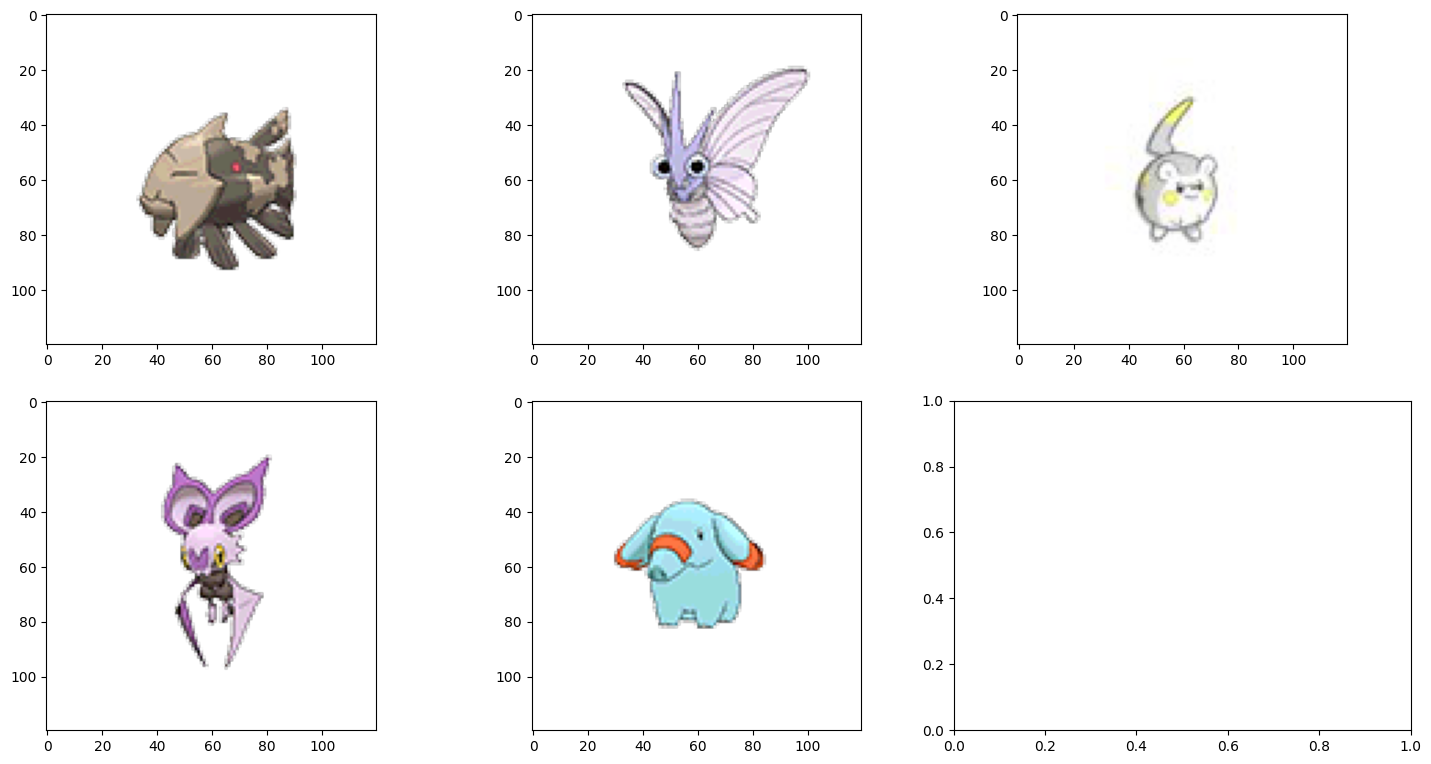

In [23]:
from PIL import Image

root_dir = "/content/poke/images/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)

print("This is the list of all the files present in the path given to us:\n")
print(File_names)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()

In [24]:
data = pd.read_csv("/content/poke/pokemon.csv")

data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [25]:
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [26]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [27]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [29]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 
    final_images.append(np.array(img))
    final_labels.append(np.array(label))
    
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [28]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 43200)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               4320100   
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 18)                1818      
                                                                 
Total params: 4,342,118
Trainable params: 4,342,118
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(final_images, final_labels, epochs=50)

Epoch 1/50
26/26 [==============================] - 5s 128ms/step - loss: 4.0173 - accuracy: 0.1075
Epoch 2/50
26/26 [==============================] - 2s 78ms/step - loss: 3.1256 - accuracy: 0.1533
Epoch 3/50
26/26 [==============================] - 2s 64ms/step - loss: 2.6456 - accuracy: 0.1867
Epoch 4/50
26/26 [==============================] - 2s 79ms/step - loss: 2.4401 - accuracy: 0.2559
Epoch 5/50
26/26 [==============================] - 2s 96ms/step - loss: 2.2124 - accuracy: 0.2892
Epoch 6/50
26/26 [==============================] - 2s 74ms/step - loss: 1.9794 - accuracy: 0.3733
Epoch 7/50
26/26 [==============================] - 2s 60ms/step - loss: 1.7652 - accuracy: 0.4376
Epoch 8/50
26/26 [==============================] - 2s 63ms/step - loss: 1.5159 - accuracy: 0.5278
Epoch 9/50
26/26 [==============================] - 2s 62ms/step - loss: 1.2775 - accuracy: 0.6168
Epoch 10/50
26/26 [==============================] - 2s 65ms/step - loss: 1.0815 - accuracy: 0.6774
Epoch 11

In [31]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

print("\n",predictions[0])
id = np.argmax(predictions[0])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id,labels[id]))
print("accuracy of the model",history.history['accuracy'][-1])

26/26 [==============================] - 0s 12ms/step

 [2.8569366e-05 2.4825968e-07 9.9978185e-01 9.1799734e-07 3.3899374e-05
 7.0693073e-05 3.5704265e-06 4.2245136e-07 4.2058895e-05 1.2674525e-10
 5.5111163e-06 5.4426359e-06 1.3239145e-08 8.8025899e-08 6.6498686e-08
 2.3568028e-09 2.6664798e-05 1.0575644e-15]

id that we got from the model as prediction: 2
Type of pokemon associted with that id: Water 
accuracy of the model 0.9035846590995789
